<a href="https://colab.research.google.com/github/AJ-4-beep/MAT-421/blob/main/MAT421HWB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HWB Part 2

The Lagrange Polynomial Interpolation is an interpolation where a single polynomial is used to connect data points (and estimate unknown values). The Langrange polynomial is itself a polynomial used to estimate functions, among other things, and is built from using a sum of polynomials. This can be shown in code, with a Lagrange polynomial acting as an interpolating function:

In [34]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

In [35]:
x = [1,2,3]
y = [2,3,1]
f = lagrange(x,y)
x_new = np.arange(-1.0, 3.1, 0.1)

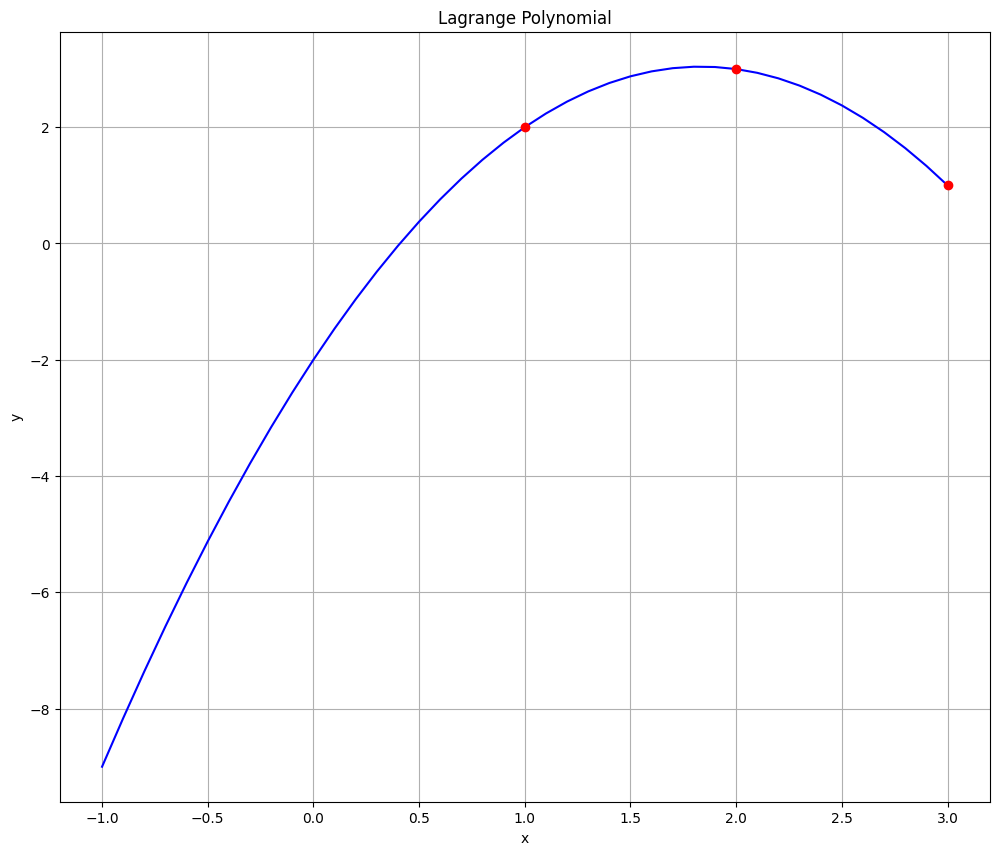

In [36]:
fig = plt.figure(figsize = (12,10))

plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')

plt.show()


As can be seen, the Langrange Polynomial Interpolation uses a polynomial to interpolate, unlike the cubic spline interpolation which uses piecewise cubic functions between points. It's useful for applyinga simpler function to estimate unknown values.

Newton's Polynomial Interpolation is another method that can be used for interpolating. This function has the general form of a summation from 0 to n, of ai * ni(x), where a represents coefficients, and ni represents a set from j = 0 to i = 1 of (x - xj) multiplied out.

By this nature, an interative equation can be written out to determing the function; this means that, even as adding more determined coefficients of a, that the previous coefficients will not change. This is useful for estimating functions with varying levels of accuracy.

When calculating more and more coefficients for this type of formula, a regular pattern is seen in developing the coefficients, as each coefficient is an iterative function of the x and y values of the coefficients preceding it. Thus, calcuating mroe and more coefficients creates divided differences, which is the term attributed to this iterative pattern (more specifically, the terms in that pattern) and can be calculated independtly, and then used to build the interpolation function. The code below shows this:

In [37]:
def divided_diff(x, y):

  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y
  for j in range(1,n):
    for i in range(n-j):
     coef[i][j] = \
  (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

def newton_poly(coef, x_data, x):


  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

The divided difference function can be separated from the newton interpolation function, as it follows a regular pattern. Now an interpolation can be graphed.

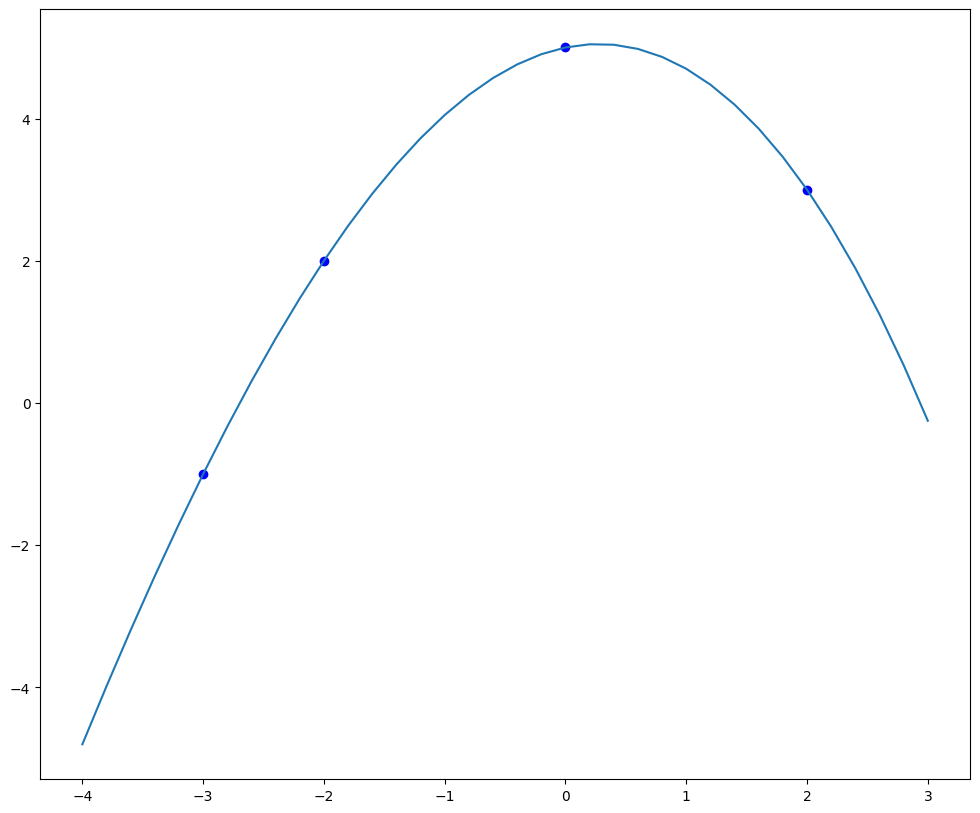

In [38]:
x = np.array([-3,-2,0,2])
y = np.array([-1,2,5,3])

a_s = divided_diff(x, y)[0, :]


x_new = np.arange(-4,3.1,.2)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 10))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

As can be seen, the newton interpolation connects the points with a polynomial. This is best used when wanting different accuracies of estimation for a dataset.